## Module 4. Network Visualization

Disclaimer: visualizations can be pretty and insightful, however for large networks they tend to be just pretty! Knowing how to compute network measures is the key!

* visualization with NetworkX: *"NetworkX provides basic functionality for visualizing graphs, but its main goal is to enable graph analysis rather than perform graph visualization. In the future, graph visualization functionality may be removed from NetworkX or only available as an add-on package."*

* nxviz
* Matplotlib or Graphviz with pydot (import and export NetworkX graphs in Graphviz dot format using pydot)
* Gephi
* Graphviz
* Neo4j
* D3
* etc.

**nxviz**: network visualization package

Installation:
`$ pip install nxviz`


If already installed, to upgrade to latest versions: `$ pip install networkx --upgrade` and `$ pip install nxviz --upgrade`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import networkx as nx
import nxviz as nv

%matplotlib inline 

In [2]:
# check version 
print('NetworkX: ', nx.__version__)
print('nxviz: ', nv.__version__)

NetworkX:  2.5.1
nxviz:  0.3.6


### Basic drawing methods in NetworkX module: 
* `nx.draw()`
* `nx.draw_random()`
* `nx.draw_spectral()`
* `nx.draw_circular()`
* `nx.draw_spring()`
* `nx.draw_shell()`

In [3]:
# nxviz package provides some nice visualization options
import nxviz as nv

In [4]:
# load datafile
G = nx.karate_club_graph()

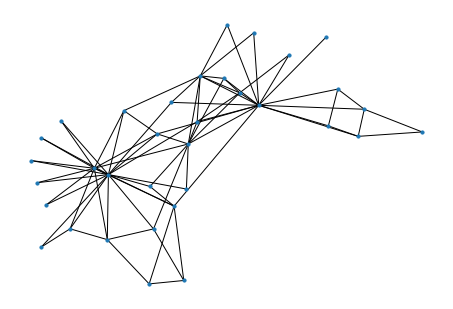

In [5]:
nx.draw(G, node_size=10)

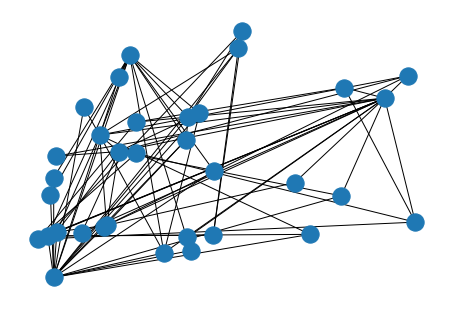

In [6]:
nx.draw_random(G)

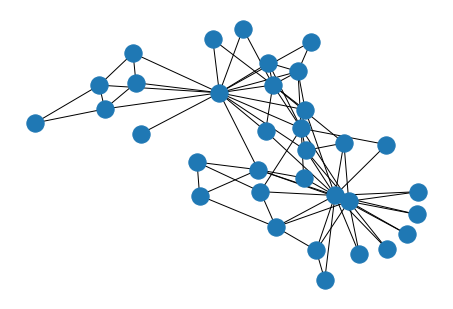

In [7]:
nx.draw_spring(G)

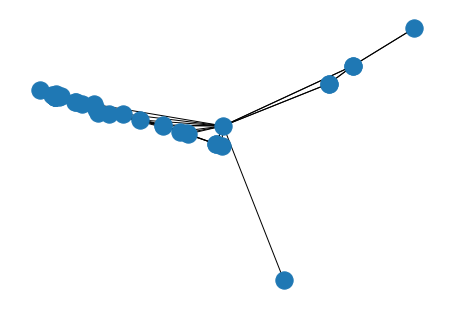

In [8]:
nx.draw_spectral(G)

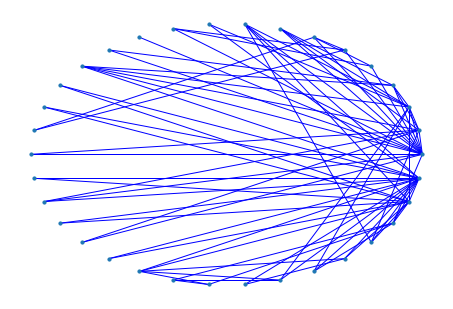

In [9]:
nx.draw_circular(G, edge_color='blue', node_size=10)

### Visualize subgraphs

In [10]:
# assign selected subgraph to a new graph
nodes = list(G.neighbors(10))
nodes.append('10')
G_sub = G.subgraph(nodes)

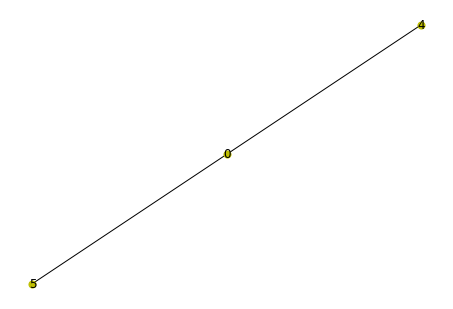

In [11]:
# drawing options: set node size, color, labels, etc. (check documentation for more)
nx.draw(G_sub, node_size=50, node_color='y', with_labels=True)

### Visualize with Nxviz

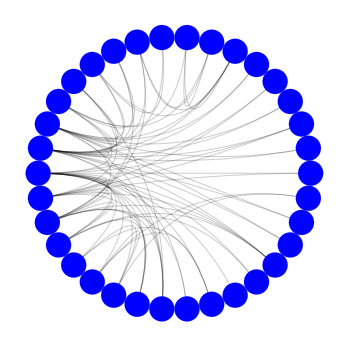

In [12]:
nv.CircosPlot(G).draw()

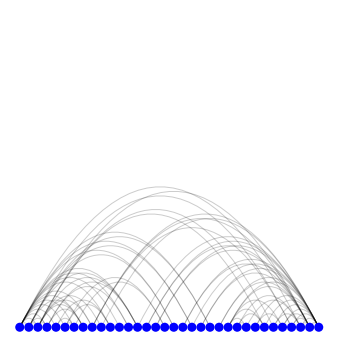

In [13]:
nv.ArcPlot(G).draw()

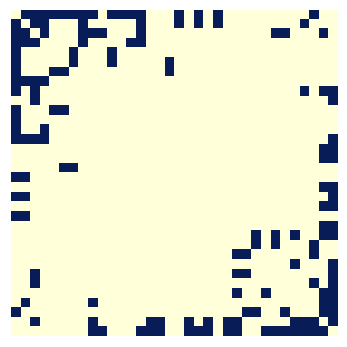

In [14]:
nv.MatrixPlot(G).draw()

### Network with node attributes

* how to import node attributes located in a separate file

In [15]:
# lexical network: David Copperfield
G_lex = nx.read_edgelist("../datafiles/lexical/david_copperfield/out.adjnoun_adjacency_adjacency", comments='%')

Nodes are listed as numbers, but when visualizing our network, we would like to see the words that represent those nodes. The words are stored in a separate file, in `ent.adjnoun_adjacency_adjacency.word.name`, and the index of the word corresponds to the index of the node. 

In [16]:
# load node name data for each node in the network
with open("../datafiles/lexical/david_copperfield/ent.adjnoun_adjacency_adjacency.word.name") as file:
    node_name = {}
    i = 1 
    for line in file:
        node_name[str(i)] = line.strip()
        i += 1

In [17]:
# assign the name of the node to the node in the graph
nx.set_node_attributes(G_lex, node_name, 'name')

In [18]:
nx.get_node_attributes(G_lex, 'name')

{'1': 'man',
 '10': 'aunt',
 '100': 'possible',
 '101': 'side',
 '102': 'perfect',
 '103': 'poor',
 '104': 'quiet',
 '105': 'same',
 '106': 'strong',
 '107': 'something',
 '108': 'true',
 '109': 'usual',
 '11': 'bad',
 '110': 'family',
 '111': 'world',
 '112': 'year',
 '12': 'air',
 '13': 'boy',
 '14': 'black',
 '15': 'beautiful',
 '16': 'face',
 '17': 'letter',
 '18': 'little',
 '19': 'young',
 '2': 'agreeable',
 '20': 'best',
 '21': 'course',
 '22': 'friend',
 '23': 'love',
 '24': 'part',
 '25': 'room',
 '26': 'thing',
 '27': 'time',
 '28': 'way',
 '29': 'better',
 '3': 'old',
 '30': 'heart',
 '31': 'mind',
 '32': 'place',
 '33': 'right',
 '34': 'state',
 '35': 'woman',
 '36': 'word',
 '37': 'door',
 '38': 'eye',
 '39': 'bright',
 '4': 'person',
 '40': 'evening',
 '41': 'morning',
 '42': 'certain',
 '43': 'day',
 '44': 'other',
 '45': 'child',
 '46': 'happy',
 '47': 'common',
 '48': 'dark',
 '49': 'kind',
 '5': 'short',
 '50': 'night',
 '51': 'dear',
 '52': 'good',
 '53': 'home',
 '5

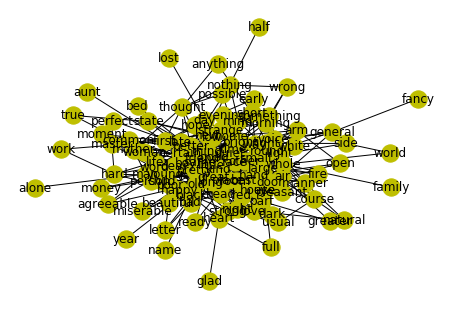

In [19]:
nx.draw(G_lex, labels=node_name, node_color='y')

In [20]:
degrees = [deg for node, deg in nx.degree(G_lex)]

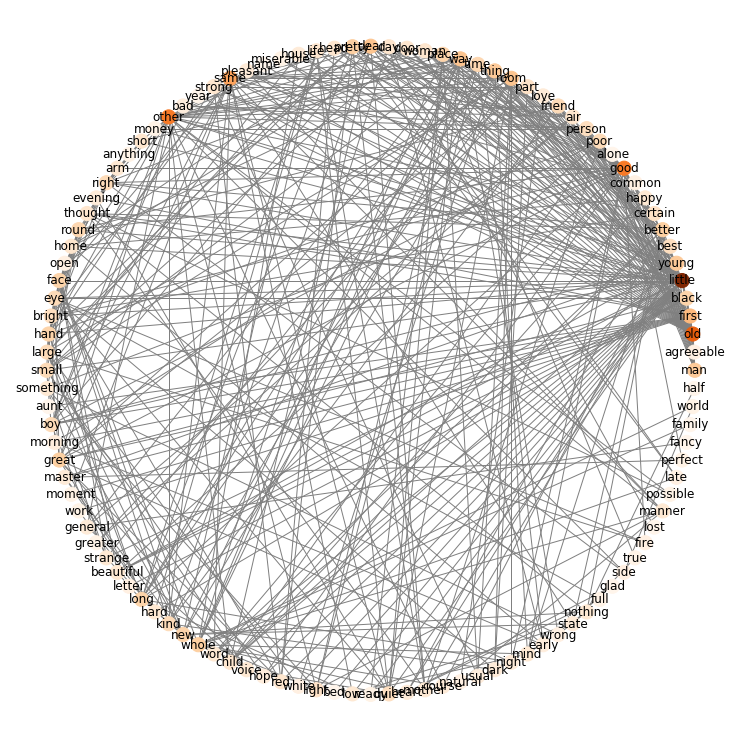

In [21]:
plt.figure(figsize=(10,10))
nx.draw_circular(G_lex, labels=node_name, node_color=degrees, 
                 node_size=200, edge_color='gray', cmap='Oranges')

### Community visualization

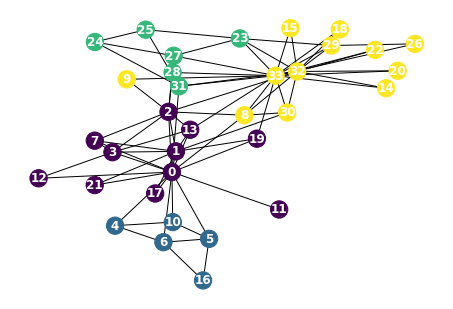

In [22]:
import community
G = nx.karate_club_graph()
partitions = community.best_partition(G)
nx.draw(G, with_labels=True, font_weight='bold',font_color='white', node_color=list(partitions.values()))

In [23]:
# save visualization to image file
plt.gcf().savefig('graph.png', dpi=300)

### Create toy graph

In [24]:
T = nx.Graph()

In [25]:
T.add_nodes_from([i for i in range(12)])
nx.set_node_attributes(T, {0: 'white', 1: "salmon", 2: "salmon", 3: "salmon", 4: "salmon", 5: "salmon",
                           6: "gray", 7: "blue", 8: "blue", 9: "blue", 10: "blue", 11: "blue"}, name="color")
T.add_edges_from([(1,2), (2,3), (1,3), (2,4), (2,5), (3,4), (3,5), (4,5), (6,4), (6,5), 
                  (6,7), (6,8), (7,8), (7,9), (8,9), (7,10), (8,11), (9,10), (9,11), (10,11)])

In [26]:
T.nodes[1]['color']

'salmon'

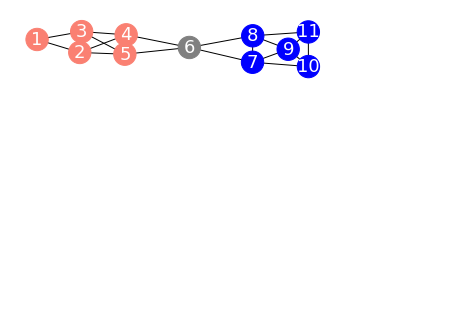

In [31]:
colors = [T.nodes[n]['color'] for n in T.nodes()]
nx.draw(T, node_color=colors, with_labels=True, font_color='white', node_size=500, 
        font_size=18)